#**MODEL ANALYSIS - CNN, RESNET, LENET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
import os
from glob import glob
from PIL import Image
from scipy import stats
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Major_project/HAM10000_metadata.csv')


In [ ]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
cancerous_mapping = {
    'nv': 0,     # Not cancerous
    'mel': 1,    # Cancerous
    'bkl': 0,    # Not cancerous
    'bcc': 1,    # Cancerous
    'akiec': 1,  # Cancerous
    'vasc': 0,   # Not cancerous
    'df': 0      # Not cancerous
}

In [ ]:
df['cancerous_mapping'] = df['dx'].map(cancerous_mapping)


In [ ]:
df.sample(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,cancerous_mapping
1233,HAM_0001150,ISIC_0030486,mel,histo,80.0,male,ear,1
3311,HAM_0005332,ISIC_0027389,nv,follow_up,45.0,female,abdomen,0
1408,HAM_0004364,ISIC_0027721,mel,histo,75.0,male,face,1
5272,HAM_0006335,ISIC_0028892,nv,follow_up,40.0,male,upper extremity,0
1906,HAM_0004620,ISIC_0033122,mel,histo,55.0,male,trunk,1
1282,HAM_0006253,ISIC_0030171,mel,histo,65.0,male,back,1
5979,HAM_0007309,ISIC_0025151,nv,follow_up,30.0,male,abdomen,0
8211,HAM_0002154,ISIC_0030840,nv,histo,70.0,male,chest,0
321,HAM_0007332,ISIC_0027780,bkl,histo,70.0,male,lower extremity,0
5034,HAM_0002816,ISIC_0028405,nv,follow_up,60.0,female,back,0


<ipython-input-9-dba0788571d2>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_age['age'], fit=stats.norm, color='red');


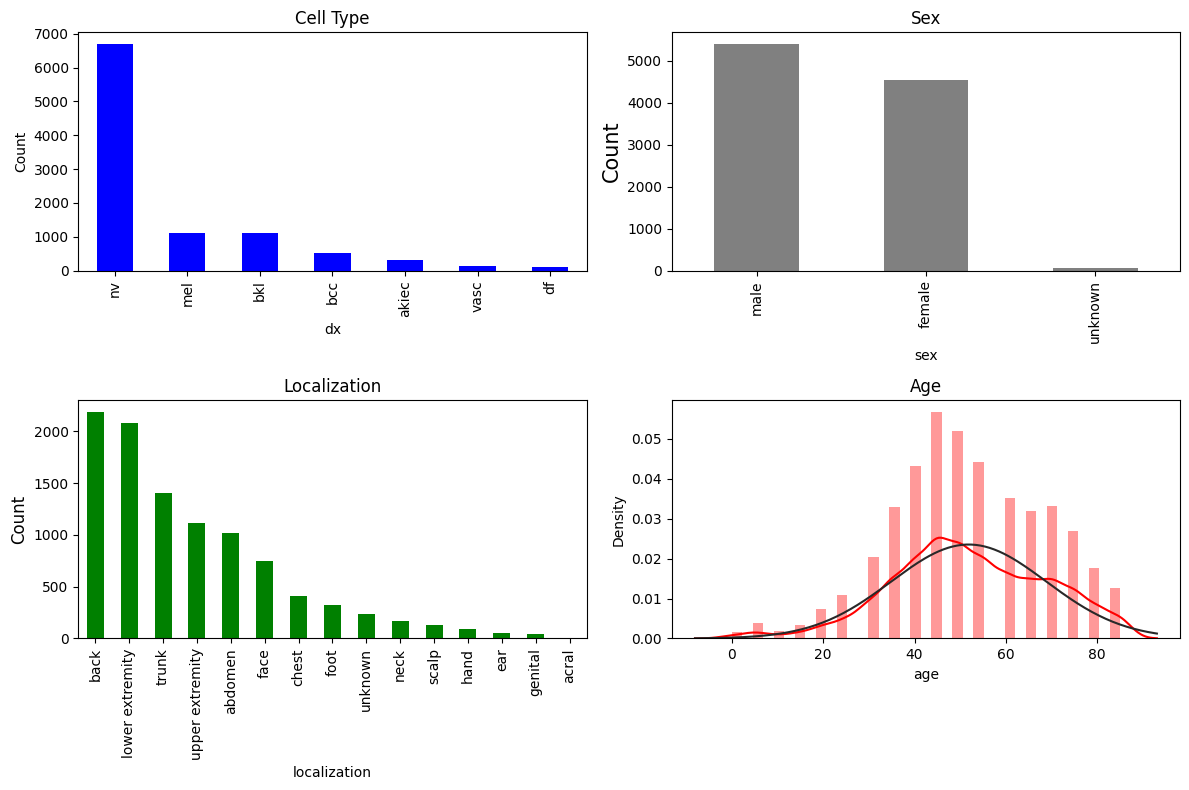

In [ ]:
# Data distribution visualization

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(221)
df['dx'].value_counts().plot(kind='bar', ax=ax1, color='blue')
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
df['sex'].value_counts().plot(kind='bar', ax=ax2, color='grey')
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
df['localization'].value_counts().plot(kind='bar', color='green')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')

ax4 = fig.add_subplot(224)
sample_age = df[pd.notnull(df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()


In [ ]:
print(pd.value_counts(df['dx']))

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


<ipython-input-10-c6941f8cadb3>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(df['dx']))


In [ ]:
print(pd.value_counts(df['dx_type']))

dx_type
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: count, dtype: int64


<ipython-input-11-057b93ad9dd2>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(df['dx_type']))


In [ ]:
print(df['cancerous_mapping'].value_counts())

cancerous_mapping
0    8061
1    1954
Name: count, dtype: int64


In [ ]:
# Balance the Dataset
df_cancerous = df[df['cancerous_mapping'] == 1]
df_non_cancerous = df[df['cancerous_mapping'] == 0]

In [ ]:
# Determine Number of Samples for Balancing
n_samples = min(len(df_cancerous), len(df_non_cancerous))

In [ ]:
# Resample to Balance
from sklearn.utils import resample
df_cancerous_balanced = resample(df_cancerous, replace=False, n_samples=n_samples, random_state=42)
df_non_cancerous_balanced = resample(df_non_cancerous, replace=False, n_samples=n_samples, random_state=42)

In [ ]:
 #Combine Balanced Dataframes
skin_df_balanced = pd.concat([df_cancerous_balanced, df_non_cancerous_balanced])

# Shuffle the Dataset
skin_df_balanced = skin_df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Verify Balancing
print("Balanced Class Distribution:")
print(skin_df_balanced['cancerous_mapping'].value_counts())

Balanced Class Distribution:
cancerous_mapping
1    1954
0    1954
Name: count, dtype: int64


In [ ]:
# # Define paths
# images_part_1 = '/content/drive/MyDrive/Major_project/HAM10000_images_part_1'
# images_part_2 = '/content/drive/MyDrive/Major_project/HAM10000_images_part_2'


In [ ]:
# Destination folders
cancerous_dir = '/content/drive/MyDrive/Major_project/cancerous/'
non_cancerous_dir = '/content/drive/MyDrive/Major_project/non_cancerous/'

In [ ]:
# # Create directories if they don't exist
# os.makedirs(cancerous_dir, exist_ok=True)
# os.makedirs(non_cancerous_dir, exist_ok=True)

In [ ]:
# for index, row in df.iterrows():
#     image_file = row['image_id'] + '.jpg'

#     # Image path (part 1 or part 2)
#     if os.path.exists(os.path.join(images_part_1, image_file)):
#         image_path = os.path.join(images_part_1, image_file)
#     elif os.path.exists(os.path.join(images_part_2, image_file)):
#         image_path = os.path.join(images_part_2, image_file)
#     else:
#         continue


#     if row['cancerous_mapping'] == 1:
#         shutil.copy(image_path, cancerous_dir)
#     else:
#         shutil.copy(image_path, non_cancerous_dir)

# print("Images successfully classified and copied.")


Images successfully classified and copied.


In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Set parameters
IMG_HEIGHT, IMG_WIDTH = 32, 32
BATCH_SIZE = 32
EPOCHS = 50
NUM_CLASSES = 2  # Cancerous and Non-Cancerous

In [ ]:
# Load images and labels
def load_data(cancerous_dir, non_cancerous_dir):
    images = []
    labels = []

    # Load cancerous images
    for img_name in os.listdir(cancerous_dir):
        img_path = os.path.join(cancerous_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
        images.append(img)
        labels.append(1)  # Cancerous

    # Load non-cancerous images
    for img_name in os.listdir(non_cancerous_dir):
        img_path = os.path.join(non_cancerous_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
        images.append(img)
        labels.append(0)  # Non-Cancerous

    return np.array(images), np.array(labels)


In [ ]:
# Load data
images, labels = load_data(cancerous_dir, non_cancerous_dir)

In [ ]:
# Normalize images
images = images.astype('float32') / 255.0

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# **CNN Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
# Define the CNN architecture with padding to avoid negative dimensions
def create_cnn_model():
    model = models.Sequential()

    # First convolutional layer with padding
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second convolutional layer with padding
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third convolutional layer with padding
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Fourth convolutional layer with padding
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output from the convolutional layers
    model.add(layers.Flatten())

    # Fully connected layer with 512 units
    model.add(layers.Dense(512, activation='relu'))

    # Dropout layer to prevent overfitting
    model.add(layers.Dropout(0.5))

    # Output layer for multi-class classification
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

    return model

In [ ]:
# Create the CNN model
cnn_model = create_cnn_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Print the model summary
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_62 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 504,514 (1.92 MB)

 Trainable params: 504,514 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model
cnn_history = cnn_model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
                            validation_data=(X_test, y_test),
                            epochs=EPOCHS,
                            verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 37s 134ms/step - accuracy: 0.8016 - loss: 0.5194 - val_accuracy: 0.7983 - val_loss: 0.4477
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 135ms/step - accuracy: 0.8134 - loss: 0.4252 - val_accuracy: 0.7983 - val_loss: 0.4127
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 134ms/step - accuracy: 0.8040 - loss: 0.4219 - val_accuracy: 0.7983 - val_loss: 0.4421
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 45s 149ms/step - accuracy: 0.8042 - loss: 0.4044 - val_accuracy: 0.8053 - val_loss: 0.3861
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 34s 136ms/step - accuracy: 0.8188 - loss: 0.3749 - val_accuracy: 0.8038 - val_loss: 0.3767
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 143ms/step - accuracy: 0.8145 - loss: 0.3773 - val_accuracy: 0.8058 - val_loss: 0.3817
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 159ms/step - accuracy: 0.8203 - loss: 0.3806 - val_accuracy: 0.8253 - val_loss: 0.3626
Epoch 8/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 139ms/step - accuracy: 0.8258 - loss: 0.3639 - val

In [ ]:
# Evaluate the model
test_loss_cnn, test_accuracy_cnn = cnn_model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy (CNN): {test_accuracy_cnn:.4f}, Test loss (CNN): {test_loss_cnn:.4f}')

63/63 - 1s - 23ms/step - accuracy: 0.8447 - loss: 0.3509
Test accuracy (CNN): 0.8447, Test loss (CNN): 0.3509


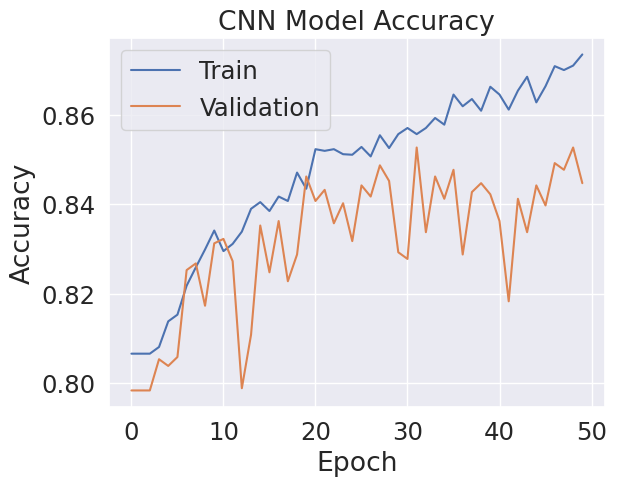

In [ ]:
# Plot training & validation accuracy values
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


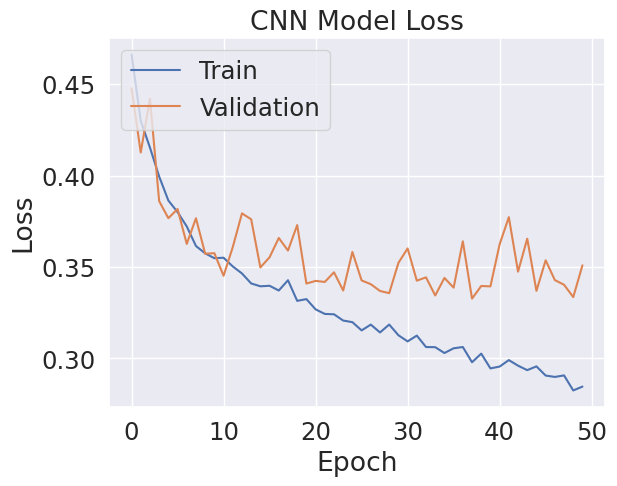

In [ ]:
# Plot training & validation loss values
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Make predictions using CNN
y_pred_cnn = cnn_model.predict(X_test)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)
y_true_cnn = y_test  # Ground truth labels

# Print first 20 predictions (for reference)
print("True labels (first 20):", y_true_cnn[:20])
print("Predicted labels (first 20):", y_pred_classes_cnn[:20])

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
True labels (first 20): [1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0]
Predicted labels (first 20): [1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0]


In [ ]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix
cm_cnn = confusion_matrix(y_true_cnn, y_pred_classes_cnn)
print("Confusion Matrix:\n", cm_cnn)


Confusion Matrix:
 [[1446  153]
 [ 158  246]]


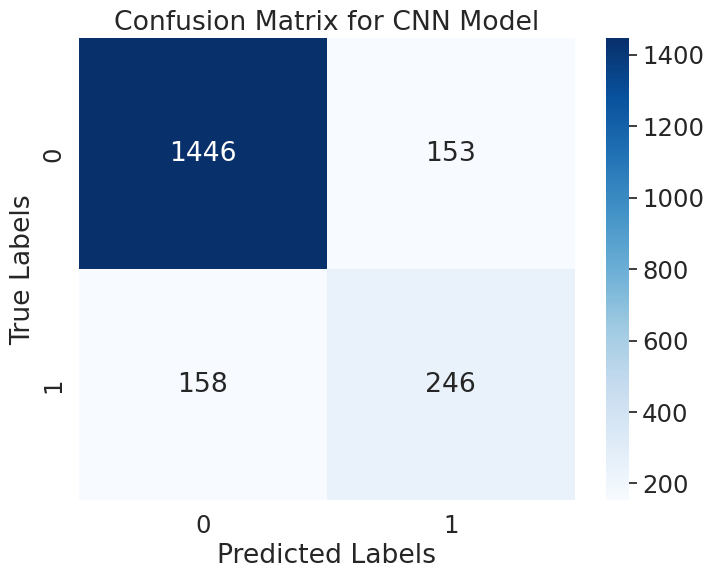

In [ ]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(NUM_CLASSES), yticklabels=np.arange(NUM_CLASSES))
plt.title('Confusion Matrix for CNN Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
# print(y_test_binarized.shape)  # Check if the shape is (num_samples, num_classes)


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step


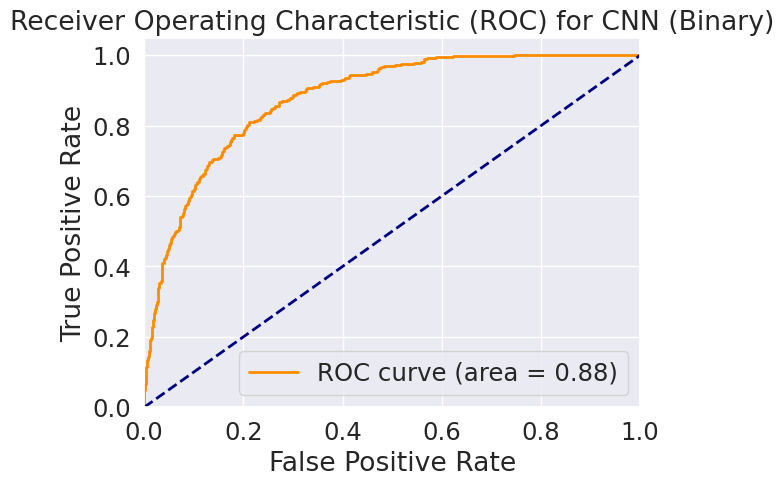

ROC AUC: 0.8801


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binary classification case
# Get probabilities for the positive class (class 1)
y_score = cnn_model.predict(X_test)[:, 1]  # Extract probabilities for class 1 (positive class)

# Compute ROC curve and AUC for the positive class
fpr, tpr, _ = roc_curve(y_true_cnn, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {0:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for CNN (Binary)')
plt.legend(loc="lower right")
plt.show()

# Print ROC AUC score
print(f'ROC AUC: {roc_auc:.4f}')



In [ ]:
print(f'y_score shape: {y_score.shape}')


y_score shape: (2003, 2)


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


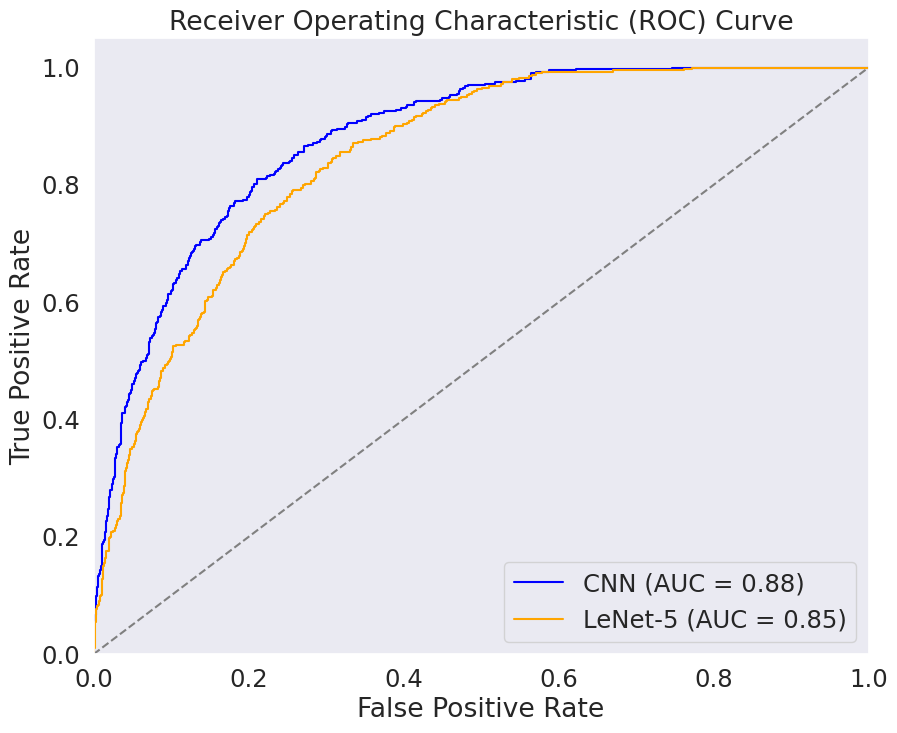

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Make predictions using CNN and get probabilities
y_pred_prob_cnn = cnn_model.predict(X_test)
# For binary classification, get probabilities for the positive class
y_pred_prob_cnn = y_pred_prob_cnn[:, 1]

# Compute ROC curve and ROC area for CNN
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_prob_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# Make predictions using LeNet-5 and get probabilities
y_pred_prob_lenet = model.predict(X_test)
y_pred_prob_lenet = y_pred_prob_lenet[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and ROC area for LeNet-5
fpr_lenet, tpr_lenet, _ = roc_curve(y_test, y_pred_prob_lenet)
roc_auc_lenet = auc(fpr_lenet, tpr_lenet)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_cnn, tpr_cnn, color='blue', label='CNN (AUC = {:.2f})'.format(roc_auc_cnn))
plt.plot(fpr_lenet, tpr_lenet, color='orange', label='LeNet-5 (AUC = {:.2f})'.format(roc_auc_lenet))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# **LeNet-5 Model**

In [ ]:
# LeNet-5 Model Definition
def create_lenet5_model():
    model = models.Sequential()

    # Layer 1: Convolutional Layer
    model.add(layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))

    # Layer 2: Convolutional Layer
    model.add(layers.Conv2D(16, (5, 5), activation='tanh'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))

    # Layer 3: Convolutional Layer
    model.add(layers.Conv2D(120, (5, 5), activation='tanh'))

    # Flatten the output
    model.add(layers.Flatten())

    # Fully Connected Layer
    model.add(layers.Dense(84, activation='tanh'))

    # Output Layer
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

    return model

In [ ]:
# Create the model
model = create_lenet5_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_59 (Conv2D)                   │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,326 (239.55 KB)

 Trainable params: 61,326 (239.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
                    validation_data=(X_test, y_test),
                    epochs=EPOCHS,
                    verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - accuracy: 0.8049 - loss: 0.4945 - val_accuracy: 0.7973 - val_loss: 0.4533
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.7989 - loss: 0.4626 - val_accuracy: 0.7973 - val_loss: 0.4432
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7971 - loss: 0.4394 - val_accuracy: 0.8033 - val_loss: 0.4161
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.8012 - loss: 0.4181 - val_accuracy: 0.8063 - val_loss: 0.4041
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.8117 - loss: 0.4024 - val_accuracy: 0.8078 - val_loss: 0.4001
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.8064 - loss: 0.4008 - val_accuracy: 0.8023 - val_loss: 0.4312
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.8153 - loss: 0.3980 - val_accuracy: 0.8023 - val_loss: 0.3967
Epoch 8/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.8113 - loss: 0.3961 - val_accurac

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}')

63/63 - 1s - 9ms/step - accuracy: 0.8293 - loss: 0.3645
Test accuracy: 0.8293, Test loss: 0.3645


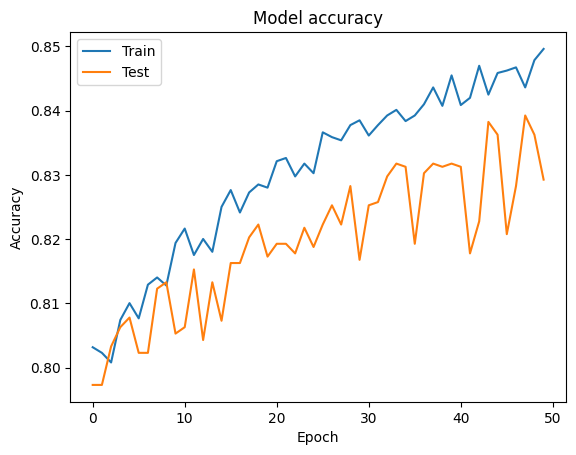

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

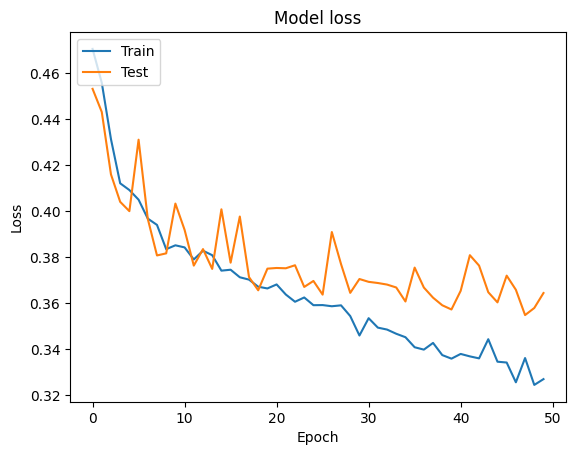

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Make predictions using LeNet-5
y_pred_lenet = model.predict(X_test)  # Assuming 'model' is your trained LeNet-5 model
y_pred_classes_lenet = np.argmax(y_pred_lenet, axis=1)  # Predicted classes
y_true_lenet = y_test  # In binary classification, y_test should already be in [0, 1] format

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

Cm_lenet = confusion_matrix(y_true_lenet, y_pred_classes_lenet)
print("Confusion Matrix:\n", Cm_lenet)

Confusion Matrix:
 [[1501   98]
 [ 244  160]]


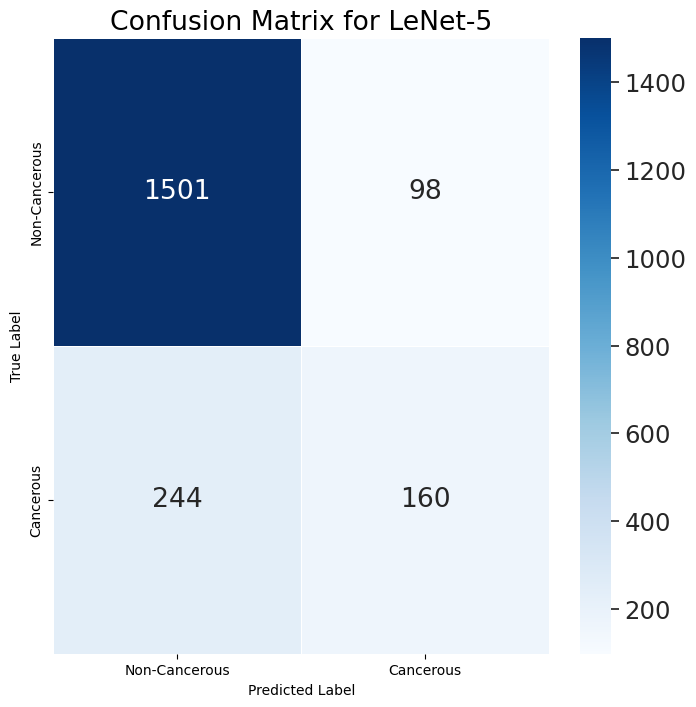

In [ ]:
# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.set(font_scale=1.6)
sns.heatmap(Cm_lenet, annot=True, fmt='d', linewidths=.5, ax=ax, cmap='Blues',
            xticklabels=['Non-Cancerous', 'Cancerous'],
            yticklabels=['Non-Cancerous', 'Cancerous'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LeNet-5')
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


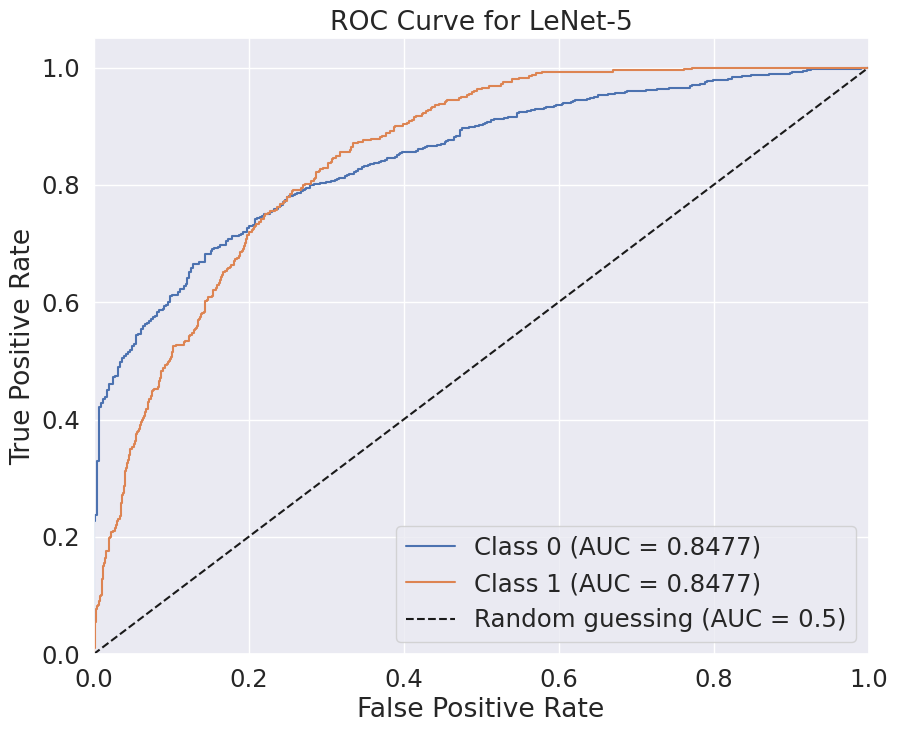

AUC for class 0: 0.8477
AUC for class 1: 0.8477


In [ ]:
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical

# Convert the true labels to categorical format for ROC AUC calculation
y_true_one_hot = to_categorical(y_test, NUM_CLASSES)  # Assuming binary classification (0 and 1)

# Predict probabilities using the trained model (LeNet-5)
y_pred_prob = model.predict(X_test)  # This returns the predicted probabilities for each class

# Compute ROC curve and AUC for both classes (cancerous and non-cancerous)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(NUM_CLASSES):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

# Plot diagonal line for random guessing (AUC = 0.5)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing (AUC = 0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LeNet-5')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print the AUC values for each class
for i in range(NUM_CLASSES):
    print(f"AUC for class {i}: {roc_auc[i]:.4f}")


# **ResNet-50**

In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [ ]:
# ResNet50 Model Definition
def create_resnet50_model():
    # Load the ResNet50 model pre-trained on ImageNet, excluding the top layer
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

    # Freeze the base model layers (to keep pre-trained weights intact)
    base_model.trainable = False

    # Add custom layers on top of ResNet50
    x = layers.Flatten()(base_model.output)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(NUM_CLASSES, activation='softmax')(x)

    # Define the final model
    model = Model(inputs=base_model.input, outputs=output)

    return model


In [ ]:
# Create the model
resnet50_model = create_resnet50_model()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Print the model summary
resnet50_model.summary()

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,637,826 (93.99 MB)

 Trainable params: 1,050,114 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Compile the model
resnet50_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model
history = resnet50_model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
                             validation_data=(X_test, y_test),
                             epochs=EPOCHS,
                             verbose=1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 69s 238ms/step - accuracy: 0.7514 - loss: 0.9674 - val_accuracy: 0.7983 - val_loss: 0.5012
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 80s 229ms/step - accuracy: 0.8063 - loss: 0.5032 - val_accuracy: 0.7983 - val_loss: 0.4997
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 83s 233ms/step - accuracy: 0.8057 - loss: 0.5014 - val_accuracy: 0.7983 - val_loss: 0.5138
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 81s 229ms/step - accuracy: 0.8002 - loss: 0.5075 - val_accuracy: 0.7983 - val_loss: 0.5119
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 79s 220ms/step - accuracy: 0.8067 - loss: 0.4978 - val_accuracy: 0.7983 - val_loss: 0.4976
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 68s 272ms/step - accuracy: 0.8066 - loss: 0.4953 - val_accuracy: 0.7983 - val_loss: 0.4956
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 70s 223ms/step - accuracy: 0.8075 - loss: 0.4952 - val_accuracy: 0.7983 - val_loss: 0.4943
Epoch 8/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 94s 271ms/step - accuracy: 0.8126 - loss: 0.4860 - val

In [ ]:
# Evaluate the model
test_loss, test_accuracy = resnet50_model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}')

63/63 - 10s - 153ms/step - accuracy: 0.7983 - loss: 0.5029
Test accuracy: 0.7983, Test loss: 0.5029


In [ ]:
# Confusion Matrix and Metrics for ResNet50
y_pred_resnet = resnet50_model.predict(X_test)
y_pred_classes_resnet = np.argmax(y_pred_resnet, axis=1)
y_true_resnet = y_test



63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 205ms/step


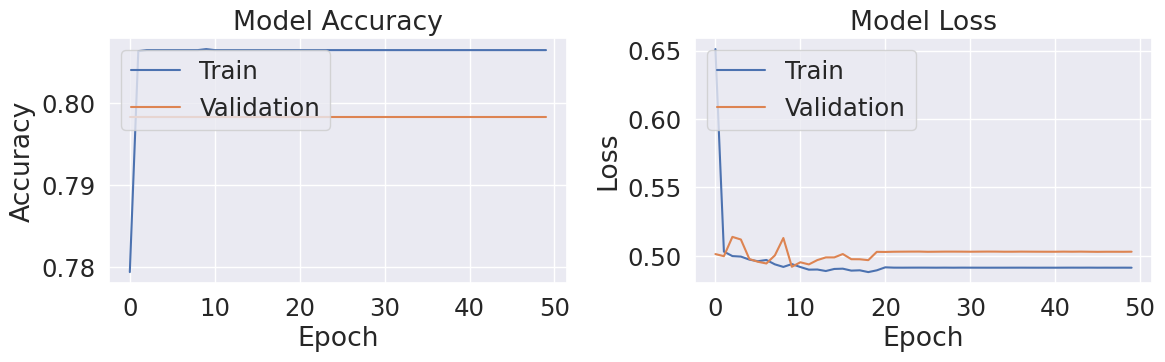

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_resnet contains predicted probabilities
# Convert probabilities to predicted class labels
y_pred_resnet_labels = np.argmax(y_pred_resnet, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_resnet_labels)

# Print the confusion matrix
print("Confusion Matrix for ResNet50:")
print(conf_matrix)


Confusion Matrix for ResNet50:
[[1599    0]
 [ 404    0]]


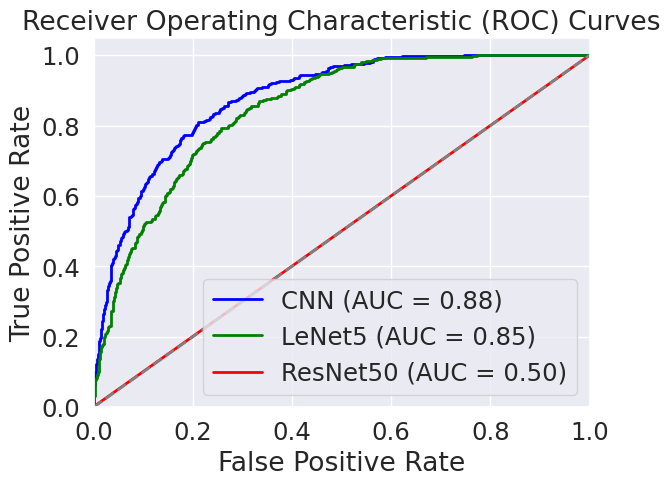

In [ ]:
# Assuming y_pred_cnn, y_pred_lenet, y_pred_resnet are predicted probabilities for class 1
# If y_pred is in the form of [prob_class_0, prob_class_1], extract class 1 probabilities.

# Use the second column (class 1 probabilities) for each model
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_cnn[:, 1])  # Extracting class 1 probabilities
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

fpr_lenet, tpr_lenet, _ = roc_curve(y_test, y_pred_lenet[:, 1])
roc_auc_lenet = auc(fpr_lenet, tpr_lenet)

fpr_resnet, tpr_resnet, _ = roc_curve(y_test, y_pred_resnet[:, 1])
roc_auc_resnet = auc(fpr_resnet, tpr_resnet)

# Plot all ROC curves
plt.figure()
plt.plot(fpr_cnn, tpr_cnn, color='blue', lw=2, label='CNN (AUC = %0.2f)' % roc_auc_cnn)
plt.plot(fpr_lenet, tpr_lenet, color='green', lw=2, label='LeNet5 (AUC = %0.2f)' % roc_auc_lenet)
plt.plot(fpr_resnet, tpr_resnet, color='red', lw=2, label='ResNet50 (AUC = %0.2f)' % roc_auc_resnet)

# Plot ROC curve for a random classifier (baseline)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()
